# Visual Analytics Project

## Imports

In [3]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import folium as fm

## Loading Data

In [2]:
cs_df = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\Visual Analytics\county_statistics.csv")
cs_df

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,4950,Valdez-Cordova Census Area,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.1,2.8,3.8,11.0,4755.0,56.9,34.6,7.8,0.7,7.5
4863,4951,Wrangell City and Borough,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.8,5.8,8.4,9.4,1095.0,52.5,32.3,12.5,2.6,7.0
4864,4952,Yakutat City and Borough,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.9,5.0,4.2,6.5,377.0,45.6,44.0,10.3,0.0,6.5
4865,4953,Yukon-Koyukuk Census Area,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.8,19.2,8.0,8.4,2082.0,38.8,56.5,4.7,0.0,19.7


In [ ]:
from pandas_profiling import ProfileReport

pp = ProfileReport(cs_df)
pp

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
Election_2020 = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\Visual Analytics\trump_biden_polls.csv")
Election_2020

C:\Users\rgs88\AppData\Local\Temp\ipykernel_18864\626369738.py:1: DtypeWarning: Columns (6,22,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  Election_2020 = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\Visual Analytics\trump_biden_polls.csv")


,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,136283,72621,2020,Iowa,383,Public Policy Polling,NaN,NaN,Public Policy Polling,263.0,...,11/2/20 09:02,NaN,https://www.publicpolicypolling.com/wp-content...,general,6223,Biden,13256,Joseph R. Biden Jr.,DEM,49.0
1,136283,72621,2020,Iowa,383,Public Policy Polling,NaN,NaN,Public Policy Polling,263.0,...,11/2/20 09:02,NaN,https://www.publicpolicypolling.com/wp-content...,general,6223,Trump,13254,Donald Trump,REP,48.0
2,136322,72647,2020,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,NaN,Susquehanna Polling & Research Inc.,326.0,...,11/2/20 12:49,NaN,https://www.realclearpolitics.com/docs/2020/Su...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,48.4
3,136322,72647,2020,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,NaN,Susquehanna Polling & Research Inc.,326.0,...,11/2/20 12:49,NaN,https://www.realclearpolitics.com/docs/2020/Su...,general,6249,Trump,13254,Donald Trump,REP,49.2
4,136322,72647,2020,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,NaN,Susquehanna Polling & Research Inc.,326.0,...,11/2/20 12:49,NaN,https://www.realclearpolitics.com/docs/2020/Su...,general,6249,Jorgensen,14611,Jo Jorgensen,LIB,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16433,92081,57026,2020,Ohio,383,Public Policy Polling,1363.0,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:45,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,46.0
16434,92082,57026,2020,Ohio,383,Public Policy Polling,1363.0,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Warren,13258,Elizabeth Warren,DEM,43.0
16435,92082,57026,2020,Ohio,383,Public Policy Polling,1363.0,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,49.0
16436,92078,57025,2020,NaN,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,12/6/18 14:40,NaN,http://www.rasmussenreports.com/public_content...,general,6210,Obama,13253,Michelle Obama,DEM,50.0


In [ ]:
from pandas_profiling import ProfileReport

tb_pp = ProfileReport(Biden_2020)
tb_pp

In [30]:
Election_2016 = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\Semester 1 Data Science MSc Projects\Visual Analytics\trump_clinton_polls.csv")

In [ ]:
from pandas_profiling import ProfileReport
tc_polls = ProfileReport(Election_2016)
tc_polls

## Dataset Inspection

In [8]:
def data_cleaning(df):
    null = df.isnull().sum()
    duplicate = df.duplicated().sum()
    percentage_null = 100*(null/len(df))
    data_type = df.dtypes
    unique = df.nunique()
    return pd.DataFrame({"Duplicated Values": duplicate,
                         "Null Values": null,
                         "Percentage of Null Values": percentage_null,
                         "Unique Values": unique,
                         "Data Type": data_type})

In [9]:
data_cleaning(cs_df)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
Unnamed: 0,0,0,0.000000,4867,int64
county,0,0,0.000000,2952,object
state,0,0,0.000000,51,object
percentage16_Donald_Trump,0,1756,36.079721,670,float64
percentage16_Hillary_Clinton,0,1756,36.079721,657,float64
total_votes16,0,1756,36.079721,2961,float64
votes16_Donald_Trump,0,1756,36.079721,2901,float64
votes16_Hillary_Clinton,0,1756,36.079721,2680,float64
percentage20_Donald_Trump,0,377,7.746045,782,float64
percentage20_Joe_Biden,0,377,7.746045,759,float64


In [10]:
data_cleaning(Election_2016)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
Unnamed: 0,0,0,0.000000,10236,int64
start_date,0,0,0.000000,345,object
end_date,0,0,0.000000,338,object
state,0,0,0.000000,57,object
pollster,0,0,0.000000,188,object
fte_grade,0,1134,11.078546,10,object
sample_size,0,3,0.029308,1589,float64
population,0,0,0.000000,4,object
Clinton,0,0,0.000000,10197,float64
Trump,0,0,0.000000,10188,float64


In [34]:
data_cleaning(Election_2016)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
Unnamed: 0,0,0,0.000000,10236,int64
start_date,0,0,0.000000,345,object
end_date,0,0,0.000000,338,object
state,0,0,0.000000,57,object
pollster,0,0,0.000000,188,object
fte_grade,0,1134,11.078546,10,object
sample_size,0,3,0.029308,1589,float64
population,0,0,0.000000,4,object
Clinton,0,0,0.000000,10197,float64
Trump,0,0,0.000000,10188,float64


Steps we take:
- Drop columns with null values > 30%
- There are no duplicate values to remove
- Change dates to date-time format

## Data Cleaning and Pre-Processing

In [50]:
#Renaming columns to make some more sense
cs_df = cs_df.rename(columns = {"Unnamed:0" : "ID",
                        "county": "County",
                        "state": "State",
                        "percentage16_Donald_Trump" : "Percentage_DT2016",
                        "percentage16_Hillary_Clinton" : "Percentage_HC2016",
                        "total_votes16" : "Total_Votes2016",
                        "votes16_Donald_Trump": "Votes_DT2016",
                        "votes16_Hillary_Clinton": "Votes_HC2016",
                        "percentage20_Donald_Trump" : "Percentage_DT2020",
                        "percentage20_Joe_Biden" : "Percentage_JB2020",
                        "total_votes20": "Total_Votes2020",
                        "votes20_Donald_Trump": "Votes_DT2020",
                        "votes20_Joe_Biden": "Votes_JB2020",
                        "cases" : "COVID-19_cases",
                        "deaths": "COVID-19_deaths"})

In [47]:
# We drop these columns since they only have 1 distinct value
Election_2020 = Election_2020.drop(columns = ["cycle", "office_type", "seat_number", "election_date", "tracking", "stage", "nationwide_batch", "ranked_choice_reallocated"])
# We drop these columns since they have lots of missing values
Election_2020 = Election_2020.drop(columns = ["seat_name", "sponsor_ids"])
# A Partisan is a strong supporter of the party (there are 410 strong democratic supporters and 333 strong republican voters)
# Answer is the vote casted by the person
# Pollsters create questions for the poll and carry it out. There role is to analyse data and bring it back to the team

#Office Type : US President, Election Date: 2020, This is not a nationwide batch, Stage: General

KeyError: "['cycle', 'office_type', 'seat_number', 'election_date', 'tracking', 'stage', 'nationwide_batch', 'ranked_choice_reallocated'] not found in axis"

In [ ]:
dates = Election_2020[["start_date", "end_date", "created_at"]]
for col in dates:
    dates[col] = pd.to_datetime(dates[col], errors = "raise")

Election_2020.drop(columns = ["start_date", "end_date", "created_at"], inplace = True)

Election_2020 = Election_2020.join(dates)

In [ ]:
Election_2020
'''Contains data on pollsters opened by pollster agencies with various display names and ratings (the pollster). They have a pollster rating
and there are partisans which have sponsored certain polls (we can investigate this to see if they have an impact). FTE Grade
is also called Full-Time Equivalent and refers to the number of hours considered full-time. We see pct which is the percen
tage of all votes from the poll that voted for that particular candidate'''



In [ ]:
dates1 = Election_2016[["start_date", "end_date"]]
for col in dates1:
    dates1[col] = pd.to_datetime(dates1[col], errors = "raise")

#Election_2016.drop(columns = ["start_date", "end_date"])
#Election_2016 = Election_2016.join(dates1)
Election_2016.info()

In [48]:
Election_2016
# Containts data on polls done all round the United States for the 2016 election
# Dem_Lead refers to the democrating lead
# fte_grade refers to the grade of full time employment for the poll

,Unnamed: 0,start_date,end_date,state,pollster,fte_grade,sample_size,population,Clinton,Trump,dem_lead
0,3077,2015-11-07,2015-11-08,South Carolina,Public Policy Polling,B+,1290.0,v,40.63694,45.19826,-4.56132
1,6520,2015-11-07,2015-11-08,South Carolina,Public Policy Polling,B+,1290.0,v,40.48820,45.19637,-4.70817
2,9901,2015-11-07,2015-11-08,South Carolina,Public Policy Polling,B+,1290.0,v,40.69941,45.18212,-4.48271
3,3206,2015-11-09,2015-11-13,Virginia,Roanoke College,C+,555.0,rv,49.81532,36.21050,13.60482
4,6638,2015-11-09,2015-11-13,Virginia,Roanoke College,C+,555.0,rv,49.00173,37.02524,11.97649
...,...,...,...,...,...,...,...,...,...,...,...
10231,3495,2016-10-28,2016-10-31,Missouri,Monmouth University,A+,405.0,lv,36.78503,51.31965,-14.53462
10232,6914,2016-10-28,2016-10-31,Missouri,Monmouth University,A+,405.0,lv,36.80368,51.26427,-14.46059
10233,9,2016-10-29,2016-10-31,U.S.,The Times-Picayune/Lucid,NaN,2600.0,lv,42.21983,41.69540,0.52443
10234,3420,2016-10-29,2016-10-31,U.S.,The Times-Picayune/Lucid,NaN,2600.0,lv,42.25737,41.58954,0.66783


In [198]:
# Some more re-engineering of columns in Election 2020
Election_2020["Poll_Time"] = Election_2020["end_date"] - Election_2020["start_date"]
Election_2020["end_date_month"] = Election_2020["end_date"].apply(lambda x : x.month)
Election_2020["end_date_year"] = Election_2020["end_date"].apply(lambda x : x.year)

# Re-engineering of columns in Election 2016
Election_2016["Poll_Time"] = Election_2016["end_date"] - Election_2016["start_date"]
Election_2016["end_date_month"] = Election_2016["end_date"].apply(lambda x : x.month)
Election_2016["end_date_year"] = Election_2016["end_date"].apply(lambda x : x.year)


In [199]:
Election_2016

,Unnamed: 0,state,pollster,fte_grade,sample_size,population,Clinton,Trump,dem_lead,start_date,end_date,Poll_Time,end_date_month,end_date_year
0,3077,South Carolina,Public Policy Polling,B+,1290.0,v,40.63694,45.19826,-4.56132,2015-11-07,2015-11-08,1 days,11,2015
1,6520,South Carolina,Public Policy Polling,B+,1290.0,v,40.48820,45.19637,-4.70817,2015-11-07,2015-11-08,1 days,11,2015
2,9901,South Carolina,Public Policy Polling,B+,1290.0,v,40.69941,45.18212,-4.48271,2015-11-07,2015-11-08,1 days,11,2015
3,3206,Virginia,Roanoke College,C+,555.0,rv,49.81532,36.21050,13.60482,2015-11-09,2015-11-13,4 days,11,2015
4,6638,Virginia,Roanoke College,C+,555.0,rv,49.00173,37.02524,11.97649,2015-11-09,2015-11-13,4 days,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,3495,Missouri,Monmouth University,A+,405.0,lv,36.78503,51.31965,-14.53462,2016-10-28,2016-10-31,3 days,10,2016
10232,6914,Missouri,Monmouth University,A+,405.0,lv,36.80368,51.26427,-14.46059,2016-10-28,2016-10-31,3 days,10,2016
10233,9,U.S.,The Times-Picayune/Lucid,NaN,2600.0,lv,42.21983,41.69540,0.52443,2016-10-29,2016-10-31,2 days,10,2016
10234,3420,U.S.,The Times-Picayune/Lucid,NaN,2600.0,lv,42.25737,41.58954,0.66783,2016-10-29,2016-10-31,2 days,10,2016


In [197]:
Election_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16438 entries, 0 to 16437
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   question_id           16438 non-null  int64          
 1   poll_id               16438 non-null  int64          
 2   state                 11385 non-null  object         
 3   pollster_id           16438 non-null  int64          
 4   pollster              16438 non-null  object         
 5   sponsors              9968 non-null   object         
 6   display_name          16438 non-null  object         
 7   pollster_rating_id    16425 non-null  float64        
 8   pollster_rating_name  16425 non-null  object         
 9   fte_grade             15253 non-null  object         
 10  sample_size           16436 non-null  float64        
 11  population            16438 non-null  object         
 12  population_full       16438 non-null  object         
 13  m

### Comparing 2016 votes to 2020 votes for Trump

In [129]:
cs_df

,Unnamed: 0,County,State,Percentage_DT2016,Percentage_HC2016,Total_Votes2016,Votes_DT2016,Votes_HC2016,Percentage_DT2020,Percentage_JB2020,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Spare_Votes2020
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,...,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4,117.0
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,...,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9,386.0
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,...,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4,188.0
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,...,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3,8151.0
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,...,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,4950,Valdez-Cordova Census Area,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.8,3.8,11.0,4755.0,56.9,34.6,7.8,0.7,7.5,NaN
4863,4951,Wrangell City and Borough,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.8,8.4,9.4,1095.0,52.5,32.3,12.5,2.6,7.0,NaN
4864,4952,Yakutat City and Borough,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.2,6.5,377.0,45.6,44.0,10.3,0.0,6.5,NaN
4865,4953,Yukon-Koyukuk Census Area,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.2,8.0,8.4,2082.0,38.8,56.5,4.7,0.0,19.7,NaN


In [130]:
cs_df["Spare_Votes2020"] = cs_df.Total_Votes2020 - (cs_df.Votes_DT2020 + cs_df.Votes_JB2020)
other_votes = cs_df.Spare_Votes2020.sum()
other_votes
cs_df["Spare_Votes2016"] = cs_df.Total_Votes2016 - (cs_df.Votes_DT2016 + cs_df.Votes_HC2016)
other_votes2 = cs_df.Spare_Votes2016.sum()
other_votes2

6220228.0

In [55]:
df1 = cs_df[["Total_Votes2016", "Votes_DT2016", "Votes_HC2016"]]
total_votes_trump = df1["Votes_DT2016"].sum()
total_votes_trump
total_votes_clinton = df1["Votes_HC2016"].sum()
total_votes_clinton

60871442.0

In [56]:
total_votes_clinton

60871442.0

In [58]:
total_votes_trump

60197547.0

Text(0.5, 1.0, '2016 General Election Votes')

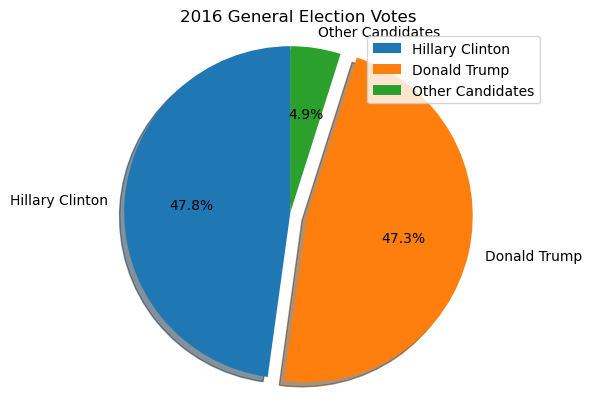

In [131]:
#2016 Pie Chart
labels = 'Hillary Clinton', 'Donald Trump', 'Other Candidates'
explode = (0, 0.1, 0)
colors = ("red", "cyan")
values = [total_votes_clinton, total_votes_trump, other_votes2]
fig1, ax1 = plt.subplots()
ax1.pie(values, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.legend(labels, loc="best")
ax1.set_title("2016 General Election Votes")

In [113]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867 entries, 0 to 4866
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4867 non-null   int64  
 1   County             4867 non-null   object 
 2   State              4867 non-null   object 
 3   Percentage_DT2016  3111 non-null   float64
 4   Percentage_HC2016  3111 non-null   float64
 5   Total_Votes2016    3111 non-null   float64
 6   Votes_DT2016       3111 non-null   float64
 7   Votes_HC2016       3111 non-null   float64
 8   Percentage_DT2020  4490 non-null   float64
 9   Percentage_JB2020  4490 non-null   float64
 10  Total_Votes2020    4633 non-null   float64
 11  Votes_DT2020       4633 non-null   float64
 12  Votes_JB2020       4633 non-null   float64
 13  lat                3252 non-null   float64
 14  long               3252 non-null   float64
 15  COVID-19_cases     3252 non-null   float64
 16  COVID-19_deaths    3252 

In [115]:
df2 = cs_df[["Total_Votes2020", "Votes_JB2020", "Votes_DT2020"]]
total_votes_biden1 = df2["Votes_JB2020"].sum()
total_votes_biden1
total_votes_trump1 = df2["Votes_DT2020"].sum()
total_votes_trump1

72691128.0

In [116]:
total_votes_biden1

78220235.0

Text(0.5, 1.0, '2020 General Election Votes')

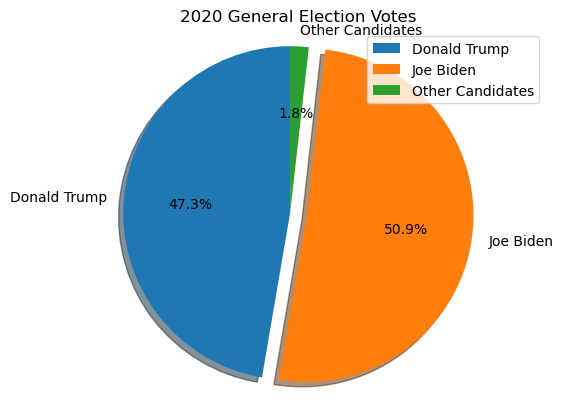

In [128]:
labels = 'Donald Trump', 'Joe Biden', 'Other Candidates'
explode = (0, 0.1, 0)
colors = ("red", "cyan", "blue")
values = [total_votes_trump1, total_votes_biden1, other_votes]
fig1, ax1 = plt.subplots()
ax1.pie(values, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.legend(labels, loc="best")
ax1.set_title("2020 General Election Votes")
# Joe Biden has 51.8% compared to the other 48.2% voted by trump

In [68]:
Election_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16438 entries, 0 to 16437
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   question_id           16438 non-null  int64  
 1   poll_id               16438 non-null  int64  
 2   state                 11385 non-null  object 
 3   pollster_id           16438 non-null  int64  
 4   pollster              16438 non-null  object 
 5   sponsors              9968 non-null   object 
 6   display_name          16438 non-null  object 
 7   pollster_rating_id    16425 non-null  float64
 8   pollster_rating_name  16425 non-null  object 
 9   fte_grade             15253 non-null  object 
 10  sample_size           16436 non-null  float64
 11  population            16438 non-null  object 
 12  population_full       16438 non-null  object 
 13  methodology           16138 non-null  object 
 14  start_date            16438 non-null  object 
 15  end_date           

In [83]:
election_numbers = Election_2020.answer.value_counts()
election_numbers
other_votes = election_numbers.drop(["Trump", "Biden"])
other_candidates = other_votes.sum()

Text(0.5, 1.0, '2020 General Election Votes')

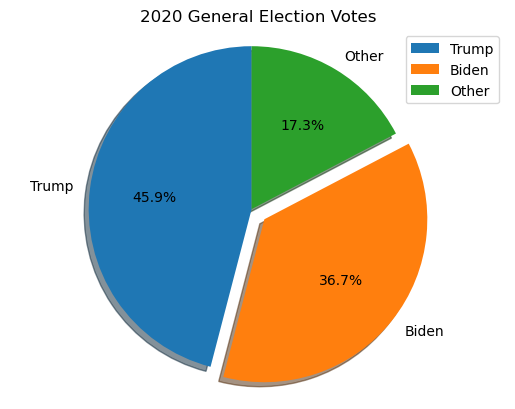

In [212]:
labels = 'Trump', 'Biden', 'Other'
explode = (0, 0.1, 0)
colors = ("red", "cyan", "green")
values = [election_numbers["Trump"], election_numbers["Biden"], other_candidates]
fig1, ax1 = plt.subplots()
ax1.pie(values, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.legend(labels, loc="best")
ax1.set_title("2020 General Election Votes")

In [108]:
df_trump = Election_2020.query('answer == "%s"' % "Trump")
df_trump.state.nunique()

55

In [109]:
df_biden = Election_2020.query('answer == "%s"' % "Biden")
df_biden.state.nunique()

55

In [119]:
Election_2020

,question_id,poll_id,state,pollster_id,pollster,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,...,partisan,created_at,notes,url,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,136283,72621,Iowa,383,Public Policy Polling,NaN,Public Policy Polling,263.0,Public Policy Polling,B,...,NaN,11/2/20 09:02,NaN,https://www.publicpolicypolling.com/wp-content...,6223,Biden,13256,Joseph R. Biden Jr.,DEM,49.0
1,136283,72621,Iowa,383,Public Policy Polling,NaN,Public Policy Polling,263.0,Public Policy Polling,B,...,NaN,11/2/20 09:02,NaN,https://www.publicpolicypolling.com/wp-content...,6223,Trump,13254,Donald Trump,REP,48.0
2,136322,72647,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,Susquehanna Polling & Research Inc.,326.0,Susquehanna Polling & Research Inc.,C,...,NaN,11/2/20 12:49,NaN,https://www.realclearpolitics.com/docs/2020/Su...,6249,Biden,13256,Joseph R. Biden Jr.,DEM,48.4
3,136322,72647,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,Susquehanna Polling & Research Inc.,326.0,Susquehanna Polling & Research Inc.,C,...,NaN,11/2/20 12:49,NaN,https://www.realclearpolitics.com/docs/2020/Su...,6249,Trump,13254,Donald Trump,REP,49.2
4,136322,72647,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,Susquehanna Polling & Research Inc.,326.0,Susquehanna Polling & Research Inc.,C,...,NaN,11/2/20 12:49,NaN,https://www.realclearpolitics.com/docs/2020/Su...,6249,Jorgensen,14611,Jo Jorgensen,LIB,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16433,92081,57026,Ohio,383,Public Policy Polling,DEM (partisan),Public Policy Polling,263.0,Public Policy Polling,B,...,DEM,12/6/18 14:45,NaN,https://www.cleveland.com/politics/2018/11/thi...,6246,Trump,13254,Donald Trump,REP,46.0
16434,92082,57026,Ohio,383,Public Policy Polling,DEM (partisan),Public Policy Polling,263.0,Public Policy Polling,B,...,DEM,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,6246,Warren,13258,Elizabeth Warren,DEM,43.0
16435,92082,57026,Ohio,383,Public Policy Polling,DEM (partisan),Public Policy Polling,263.0,Public Policy Polling,B,...,DEM,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,6246,Trump,13254,Donald Trump,REP,49.0
16436,92078,57025,NaN,399,Rasmussen Reports/Pulse Opinion Research,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,Rasmussen Reports/Pulse Opinion Research,C+,...,NaN,12/6/18 14:40,NaN,http://www.rasmussenreports.com/public_content...,6210,Obama,13253,Michelle Obama,DEM,50.0


## Men vs Women

Create geospatial map of gender dominance within different states

In [210]:
Gender = cs_df[["Men", "Women"]]
Gender

,Men,Women
0,12044.0,12744.0
1,30433.0,32174.0
2,16079.0,16761.0
3,217999.0,217118.0
4,3552.0,3640.0
...,...,...
3106,104914.0,99367.0
3107,5010.0,5099.0
3108,7190.0,7225.0
3109,6163.0,5989.0


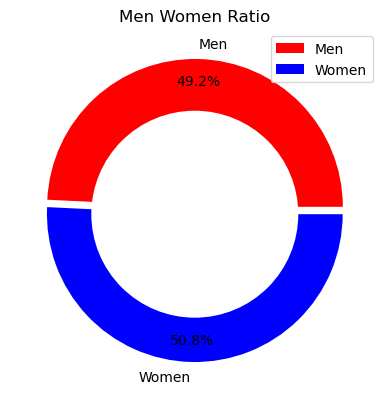

In [220]:
sizes = [len(Gender["Men"]), len(Gender["Women"])]
labels = ['Men', 'Women']
colors = ['#FF0000', '#0000FF']
explode = (0.05, 0)
values = [Gender["Men"].sum(), Gender["Women"].sum()]
plt.pie(values, colors = colors, labels = labels, explode = explode, autopct = '%1.1f%%', pctdistance=0.85)

centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.title('Men Women Ratio')

plt.legend(labels, loc = "upper right")

plt.show()

In [222]:
cs_df.columns

Index(['Unnamed: 0', 'County', 'State', 'Percentage_DT2016',
       'Percentage_HC2016', 'Total_Votes2016', 'Votes_DT2016', 'Votes_HC2016',
       'Percentage_DT2020', 'Percentage_JB2020', 'Total_Votes2020',
       'Votes_DT2020', 'Votes_JB2020', 'lat', 'long', 'COVID-19_cases',
       'COVID-19_deaths', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'Spare_Votes2020',
       'Spare_Votes2016'],
      dtype='object')

In [225]:
cs_df.Pacific.sum()

217.1

In [229]:
races_df = cs_df[["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]]
races_df.sum()

Hispanic     28029.4
White       235215.2
Black        26800.7
Native        4667.9
Asian         3763.2
Pacific        217.1
dtype: float64

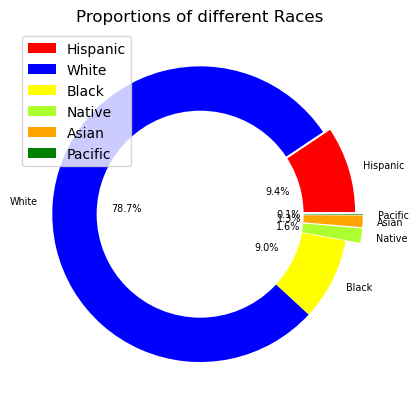

In [279]:
labels = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F',
          '#FFA500', 'green']
explode = (0.05, 0, 0, 0.1, 0.1, 0.1)
values = [races_df["Hispanic"].sum(), races_df["White"].sum(), races_df["Black"].sum(), races_df["Native"].sum(), races_df["Asian"].sum(), races_df["Pacific"].sum()]
plt.pie(values, colors = colors, labels = labels, explode = explode, autopct = '%1.1f%%', pctdistance = 0.5, textprops = {'size': 'x-small'})

centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.title('Proportions of different Races')

plt.legend(labels)

plt.show()

C:\Users\rgs88\AppData\Local\Temp\ipykernel_18864\711518882.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad = -1)


<BarContainer object of 6 artists>

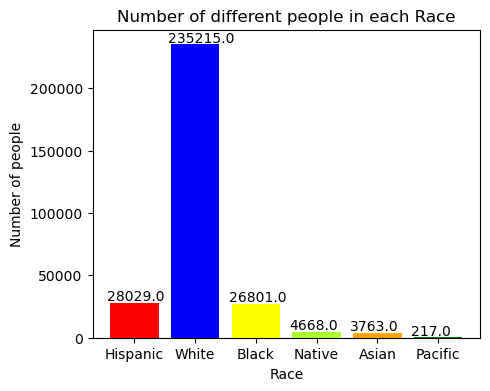

In [277]:
plt.figure(figsize = (5,4))
labels = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
values = [races_df["Hispanic"].sum(), races_df["White"].sum(), races_df["Black"].sum(), races_df["Native"].sum(), races_df["Asian"].sum(), races_df["Pacific"].sum()]
plt.text(x = 0 - 0.45, y = races_df["Hispanic"].sum() + 2000, s = round(races_df["Hispanic"].sum(), 0))
plt.text(x = 1 - 0.45, y = races_df["White"].sum() + 2000, s = round(races_df["White"].sum(), 0))
plt.text(x = 2 - 0.45, y = races_df["Black"].sum() + 2000, s = round(races_df["Black"].sum(), 0))
plt.text(x = 3 - 0.45, y = races_df["Native"].sum() + 2000, s = round(races_df["Native"].sum(), 0))
plt.text(x = 4 - 0.45, y = races_df["Asian"].sum() + 2000, s = round(races_df["Asian"].sum(), 0))
plt.text(x = 5 - 0.45, y = races_df["Pacific"].sum() + 2000, s = round(races_df["Pacific"].sum(), 0))
plt.tight_layout(pad = -1)
plt.ylabel("Number of people")
plt.xlabel("Race")
plt.title("Number of different people in each Race")

plt.bar(labels, values, color = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500', 'green'])

## Dropping all null values

In [145]:
#We drop all values which are null; despite the threshold being 30% for null values, since we have a large column over 35%, 
#we proceed by just removing the null values. When we remove the values, we realise most of
new_df = cs_df.dropna()
new_df

,Unnamed: 0,County,State,Percentage_DT2016,Percentage_HC2016,Total_Votes2016,Votes_DT2016,Votes_HC2016,Percentage_DT2020,Percentage_JB2020,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Spare_Votes2020,Spare_Votes2016
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,...,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4,117.0,270.0
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,...,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9,386.0,589.0
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,...,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4,188.0,436.0
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,...,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3,8151.0,26163.0
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,...,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0,69.0,176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,3106,Yuma,AZ,0.505,0.450,40759.0,20586.0,18336.0,0.523,0.461,...,3.0,19.6,74891.0,74.4,20.8,4.6,0.2,10.9,1099.0,1837.0
3107,3107,Yuma,CO,0.805,0.150,4664.0,3755.0,701.0,0.826,0.156,...,10.5,15.7,4940.0,71.6,15.5,12.4,0.5,2.4,85.0,208.0
3108,3108,Zapata,TX,0.328,0.656,3134.0,1028.0,2056.0,0.525,0.471,...,2.0,18.2,5146.0,66.0,21.0,12.6,0.4,12.4,15.0,50.0
3109,3109,Zavala,TX,0.204,0.777,3390.0,692.0,2633.0,0.340,0.654,...,5.4,13.7,4397.0,73.9,21.2,4.9,0.1,10.1,25.0,65.0


In [146]:
data_cleaning(new_df)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
Unnamed: 0,0,0,0.0,3046,int64
County,0,0,0.0,1768,object
State,0,0,0.0,50,object
Percentage_DT2016,0,0,0.0,656,float64
Percentage_HC2016,0,0,0.0,646,float64
Total_Votes2016,0,0,0.0,2902,float64
Votes_DT2016,0,0,0.0,2847,float64
Votes_HC2016,0,0,0.0,2620,float64
Percentage_DT2020,0,0,0.0,657,float64
Percentage_JB2020,0,0,0.0,651,float64


In [152]:
data_cleaning(Election_2020)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
question_id,0,0,0.000000,7629,int64
poll_id,0,0,0.000000,4133,int64
state,0,5053,30.739749,55,object
pollster_id,0,0,0.000000,245,int64
pollster,0,0,0.000000,223,object
sponsors,0,6470,39.360019,236,object
display_name,0,0,0.000000,239,object
pollster_rating_id,0,13,0.079085,219,float64
pollster_rating_name,0,13,0.079085,219,object
fte_grade,0,1185,7.208906,13,object


In [153]:
data_cleaning(Election_2016)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
Unnamed: 0,0,0,0.000000,10236,int64
start_date,0,0,0.000000,345,object
end_date,0,0,0.000000,338,object
state,0,0,0.000000,57,object
pollster,0,0,0.000000,188,object
fte_grade,0,1134,11.078546,10,object
sample_size,0,3,0.029308,1589,float64
population,0,0,0.000000,4,object
Clinton,0,0,0.000000,10197,float64
Trump,0,0,0.000000,10188,float64


In [179]:
Election_2016.drop(columns = ["start_date", "end_date"], inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10236 entries, 0 to 10235
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10236 non-null  int64  
 1   state        10236 non-null  object 
 2   pollster     10236 non-null  object 
 3   fte_grade    9102 non-null   object 
 4   sample_size  10233 non-null  float64
 5   population   10236 non-null  object 
 6   Clinton      10236 non-null  float64
 7   Trump        10236 non-null  float64
 8   dem_lead     10236 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 719.8+ KB


In [180]:
Election_2016 = Election_2016.join(dates1)

In [202]:
Election_2016

,Unnamed: 0,state,pollster,fte_grade,sample_size,population,Clinton,Trump,dem_lead,start_date,end_date,Poll_Time,end_date_month,end_date_year
0,3077,South Carolina,Public Policy Polling,B+,1290.0,v,40.63694,45.19826,-4.56132,2015-11-07,2015-11-08,1 days,11,2015
1,6520,South Carolina,Public Policy Polling,B+,1290.0,v,40.48820,45.19637,-4.70817,2015-11-07,2015-11-08,1 days,11,2015
2,9901,South Carolina,Public Policy Polling,B+,1290.0,v,40.69941,45.18212,-4.48271,2015-11-07,2015-11-08,1 days,11,2015
3,3206,Virginia,Roanoke College,C+,555.0,rv,49.81532,36.21050,13.60482,2015-11-09,2015-11-13,4 days,11,2015
4,6638,Virginia,Roanoke College,C+,555.0,rv,49.00173,37.02524,11.97649,2015-11-09,2015-11-13,4 days,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,3495,Missouri,Monmouth University,A+,405.0,lv,36.78503,51.31965,-14.53462,2016-10-28,2016-10-31,3 days,10,2016
10232,6914,Missouri,Monmouth University,A+,405.0,lv,36.80368,51.26427,-14.46059,2016-10-28,2016-10-31,3 days,10,2016
10233,9,U.S.,The Times-Picayune/Lucid,NaN,2600.0,lv,42.21983,41.69540,0.52443,2016-10-29,2016-10-31,2 days,10,2016
10234,3420,U.S.,The Times-Picayune/Lucid,NaN,2600.0,lv,42.25737,41.58954,0.66783,2016-10-29,2016-10-31,2 days,10,2016


## Time-Series Analysis of Polls in both Elections

In [203]:
Trump_2016 = Election_2016.query("Trump > Clinton")

In [204]:
Trump_2016

,Unnamed: 0,state,pollster,fte_grade,sample_size,population,Clinton,Trump,dem_lead,start_date,end_date,Poll_Time,end_date_month,end_date_year
0,3077,South Carolina,Public Policy Polling,B+,1290.0,v,40.63694,45.19826,-4.56132,2015-11-07,2015-11-08,1 days,11,2015
1,6520,South Carolina,Public Policy Polling,B+,1290.0,v,40.48820,45.19637,-4.70817,2015-11-07,2015-11-08,1 days,11,2015
2,9901,South Carolina,Public Policy Polling,B+,1290.0,v,40.69941,45.18212,-4.48271,2015-11-07,2015-11-08,1 days,11,2015
6,3388,Colorado,Quinnipiac University,A-,1262.0,rv,36.06331,45.78302,-9.71971,2015-11-11,2015-11-15,4 days,11,2015
7,6710,Colorado,Quinnipiac University,A-,1262.0,rv,35.86518,45.76778,-9.90260,2015-11-11,2015-11-15,4 days,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,7414,New Hampshire,Google Consumer Surveys,B,81.0,lv,41.73385,43.86280,-2.12895,2016-10-25,2016-10-31,6 days,10,2016
10223,10123,Utah,Google Consumer Surveys,B,245.0,lv,33.16064,35.16500,-2.00436,2016-10-25,2016-10-31,6 days,10,2016
10230,89,Missouri,Monmouth University,A+,405.0,lv,36.86025,51.30836,-14.44811,2016-10-28,2016-10-31,3 days,10,2016
10231,3495,Missouri,Monmouth University,A+,405.0,lv,36.78503,51.31965,-14.53462,2016-10-28,2016-10-31,3 days,10,2016


In [205]:
Clinton_2016 = Election_2016.query("Clinton > Trump")

In [206]:
Clinton_2016

,Unnamed: 0,state,pollster,fte_grade,sample_size,population,Clinton,Trump,dem_lead,start_date,end_date,Poll_Time,end_date_month,end_date_year
3,3206,Virginia,Roanoke College,C+,555.0,rv,49.81532,36.21050,13.60482,2015-11-09,2015-11-13,4 days,11,2015
4,6638,Virginia,Roanoke College,C+,555.0,rv,49.00173,37.02524,11.97649,2015-11-09,2015-11-13,4 days,11,2015
5,10030,Virginia,Roanoke College,C+,555.0,rv,49.35350,36.90794,12.44556,2015-11-09,2015-11-13,4 days,11,2015
9,3355,Wisconsin,Marquette University,A,803.0,rv,47.42836,37.97394,9.45442,2015-11-12,2015-11-15,3 days,11,2015
10,6748,Wisconsin,Marquette University,A,803.0,rv,47.27073,38.05898,9.21175,2015-11-12,2015-11-15,3 days,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10228,3433,U.S.,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,44.56527,44.09270,0.47257,2016-10-27,2016-10-31,4 days,10,2016
10229,6852,U.S.,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,44.52288,44.12998,0.39290,2016-10-27,2016-10-31,4 days,10,2016
10233,9,U.S.,The Times-Picayune/Lucid,NaN,2600.0,lv,42.21983,41.69540,0.52443,2016-10-29,2016-10-31,2 days,10,2016
10234,3420,U.S.,The Times-Picayune/Lucid,NaN,2600.0,lv,42.25737,41.58954,0.66783,2016-10-29,2016-10-31,2 days,10,2016


## Geospatial Analysis